In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading a basic dataset included in the sklearn package
data = load_breast_cancer()

# converting to pandas df immediately
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

In [3]:
# inspect the data before performing tests usually helps
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [4]:
# this dataset includes the radius of a tumor, as well as separating into benign and malignant
# we're testing whether or not there is a statistically significant difference in the radius of a benign or malignant tumor
tstat, pval = stats.ttest_ind(df[df['target'] == 0]['mean radius'], df[df['target'] == 1]['mean radius'])
print('t-statistic:', tstat)
print('p-value:', pval)

t-statistic: 25.435821610057054
p-value: 8.465940572262422e-96


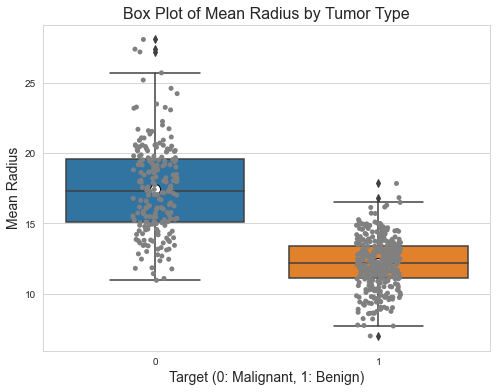

In [6]:
# boxplot of the results for assignment 4, might also include my graphs from own research
# used chatgpt as suggested for this graph, little bit too busy if you ask me
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='target', y='mean radius', data=df, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
sns.stripplot(x='target', y='mean radius', data=df, jitter=True, color='gray')
ax.set_xlabel('Target (0: Malignant, 1: Benign)', fontsize=14)
ax.set_ylabel('Mean Radius', fontsize=14)
ax.set_title('Box Plot of Mean Radius by Tumor Type', fontsize=16)
plt.show()